In [1]:
%matplotlib inline

import math
import random

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# Number of epoch
NP_EPOCH = 20

In [4]:
# Load data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


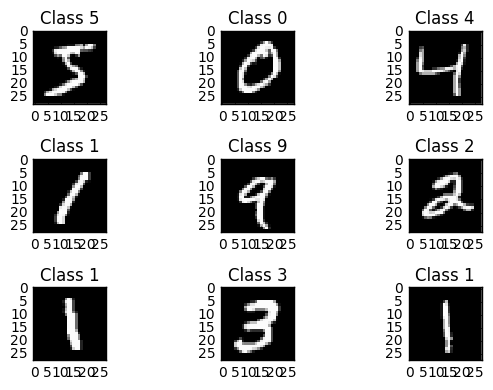

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.tight_layout()

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [7]:
# Take only 10000 out of 60000

X_train = X_train[0:10000]
X_test = X_test[0:1000]
Y_train = Y_train[0:10000]
Y_test = Y_test[0:1000]

# Basic Model

In [8]:
model = Sequential()

# input layer
model.add(Dense(input_dim=28*28, output_dim=500, activation='sigmoid'))

# hidden layer
model.add(Dense(output_dim=500, activation='sigmoid'))

# output layer
model.add(Dense(output_dim=10, activation='softmax'))

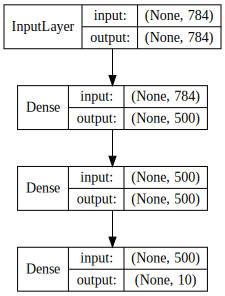

In [9]:
SVG(model_to_dot(model,
                 show_shapes=True,
                 show_layer_names=False).create(prog='dot', format='svg'))

In [10]:
model.compile(loss='mse',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [11]:
def train_and_show_result(model):
    training_history = model.fit(X_train, Y_train,
                                 batch_size=100, nb_epoch=NP_EPOCH,
                                 verbose=2)

    score = model.evaluate(X_test, Y_test)
    print("\n--------------------\nTotal Testing Loss: ", score[1], "\nTesting Accuracy: ", score[1])
    return training_history

In [12]:
def plot_training_history(training_history):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].set_xlabel('Epoch')
    axarr[0].set_ylabel('Training Accuracy')
    axarr[0].plot(list(range(1, NP_EPOCH+1)), training_history.history['acc'])
    axarr[1].set_ylabel('Training Error')
    axarr[1].plot(list(range(1, NP_EPOCH+1)), training_history.history['loss'])

In [13]:
%%time
history = train_and_show_result(model)

Epoch 1/20
1s - loss: 0.0903 - acc: 0.1134
Epoch 2/20
1s - loss: 0.0899 - acc: 0.1233
Epoch 3/20
1s - loss: 0.0898 - acc: 0.1370
Epoch 4/20
1s - loss: 0.0898 - acc: 0.1481
Epoch 5/20
1s - loss: 0.0897 - acc: 0.1313
Epoch 6/20
2s - loss: 0.0896 - acc: 0.1490
Epoch 7/20
1s - loss: 0.0895 - acc: 0.1557
Epoch 8/20
1s - loss: 0.0895 - acc: 0.1665
Epoch 9/20
1s - loss: 0.0894 - acc: 0.1664
Epoch 10/20
1s - loss: 0.0893 - acc: 0.1637
Epoch 11/20
1s - loss: 0.0893 - acc: 0.1970
Epoch 12/20
1s - loss: 0.0892 - acc: 0.1779
Epoch 13/20
1s - loss: 0.0891 - acc: 0.2797
Epoch 14/20
1s - loss: 0.0890 - acc: 0.2176
Epoch 15/20
1s - loss: 0.0889 - acc: 0.2142
Epoch 16/20
1s - loss: 0.0889 - acc: 0.3024
Epoch 17/20
1s - loss: 0.0888 - acc: 0.2004
Epoch 18/20
1s - loss: 0.0887 - acc: 0.2684
Epoch 19/20
1s - loss: 0.0886 - acc: 0.3000
Epoch 20/20
1s - loss: 0.0885 - acc: 0.2574
1000/1000 [==============================] - 0s     

--------------------
Total Testing Loss:  0.255 
Testing Accuracy:  0.255
C

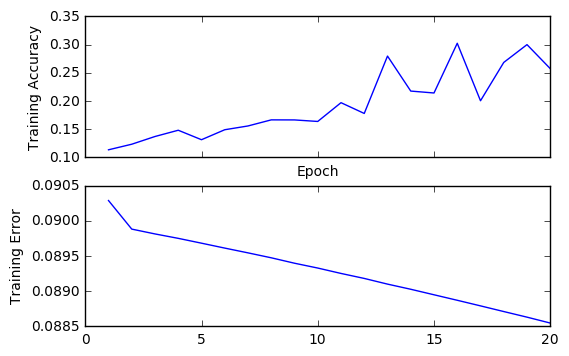

In [14]:
plot_training_history(history)

# Cross Entropy

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [16]:
%%time
history = train_and_show_result(model)

Epoch 1/20
1s - loss: 2.2467 - acc: 0.1794
Epoch 2/20
1s - loss: 1.8434 - acc: 0.4139
Epoch 3/20
1s - loss: 1.3135 - acc: 0.6400
Epoch 4/20
1s - loss: 0.9544 - acc: 0.7355
Epoch 5/20
1s - loss: 0.7579 - acc: 0.7953
Epoch 6/20
1s - loss: 0.6417 - acc: 0.8228
Epoch 7/20
1s - loss: 0.5585 - acc: 0.8483
Epoch 8/20
1s - loss: 0.5078 - acc: 0.8609
Epoch 9/20
1s - loss: 0.4661 - acc: 0.8715
Epoch 10/20
1s - loss: 0.4373 - acc: 0.8786
Epoch 11/20
1s - loss: 0.4146 - acc: 0.8834
Epoch 12/20
1s - loss: 0.3964 - acc: 0.8888
Epoch 13/20
1s - loss: 0.3820 - acc: 0.8932
Epoch 14/20
1s - loss: 0.3699 - acc: 0.8963
Epoch 15/20
1s - loss: 0.3595 - acc: 0.8974
Epoch 16/20
1s - loss: 0.3502 - acc: 0.9033
Epoch 17/20
1s - loss: 0.3425 - acc: 0.9031
Epoch 18/20
1s - loss: 0.3349 - acc: 0.9049
Epoch 19/20
1s - loss: 0.3286 - acc: 0.9062
Epoch 20/20
1s - loss: 0.3217 - acc: 0.9083
 928/1000 [==========================>...] - ETA: 0s
--------------------
Total Testing Loss:  0.879 
Testing Accuracy:  0.879
CP

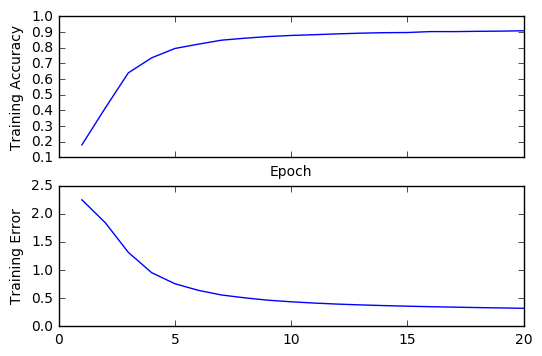

In [17]:
plot_training_history(history)

# Deeper

In [18]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='sigmoid'))

model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))

model.add(Dense(output_dim=10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [20]:
%%time
history = train_and_show_result(model)

Epoch 1/20
5s - loss: 2.4143 - acc: 0.0943
Epoch 2/20
6s - loss: 2.3579 - acc: 0.1027
Epoch 3/20
5s - loss: 2.3421 - acc: 0.1042
Epoch 4/20
5s - loss: 2.3332 - acc: 0.1000
Epoch 5/20
6s - loss: 2.3317 - acc: 0.0963
Epoch 6/20
6s - loss: 2.3231 - acc: 0.1014
Epoch 7/20
6s - loss: 2.3222 - acc: 0.1010
Epoch 8/20
6s - loss: 2.3203 - acc: 0.1034
Epoch 9/20
7s - loss: 2.3201 - acc: 0.1005
Epoch 10/20
6s - loss: 2.3169 - acc: 0.1080
Epoch 11/20
5s - loss: 2.3157 - acc: 0.1040
Epoch 12/20
5s - loss: 2.3159 - acc: 0.1043
Epoch 13/20
5s - loss: 2.3162 - acc: 0.1011
Epoch 14/20
5s - loss: 2.3124 - acc: 0.1053
Epoch 15/20
5s - loss: 2.3121 - acc: 0.1087
Epoch 16/20
6s - loss: 2.3101 - acc: 0.1045
Epoch 17/20
7s - loss: 2.3119 - acc: 0.1022
Epoch 18/20
5s - loss: 2.3100 - acc: 0.1000
Epoch 19/20
6s - loss: 2.3086 - acc: 0.1081
Epoch 20/20
7s - loss: 2.3071 - acc: 0.1044
 992/1000 [============================>.] - ETA: 0s
--------------------
Total Testing Loss:  0.107 
Testing Accuracy:  0.107
CP

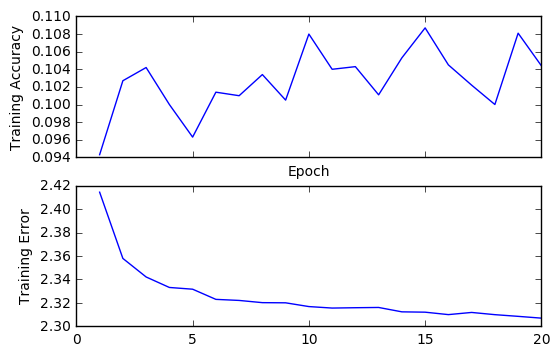

In [21]:
plot_training_history(history)

# ReLU

In [22]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='relu'))

model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dense(output_dim=500, activation='relu'))

model.add(Dense(output_dim=10, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [24]:
%%time
train_and_show_result(model)

Epoch 1/20
6s - loss: 5.3607 - acc: 0.2658
Epoch 2/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 3/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 4/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 5/20
6s - loss: 14.5385 - acc: 0.0980
Epoch 6/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 7/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 8/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 9/20
6s - loss: 14.5385 - acc: 0.0980
Epoch 10/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 11/20
6s - loss: 14.5385 - acc: 0.0980
Epoch 12/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 13/20
6s - loss: 14.5385 - acc: 0.0980
Epoch 14/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 15/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 16/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 17/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 18/20
5s - loss: 14.5385 - acc: 0.0980
Epoch 19/20
4s - loss: 14.5385 - acc: 0.0980
Epoch 20/20
5s - loss: 14.5385 - acc: 0.0980
1000/1000 [==============================] - 0s     

--------------------
Total Testing Loss:  0.11 
Testing 

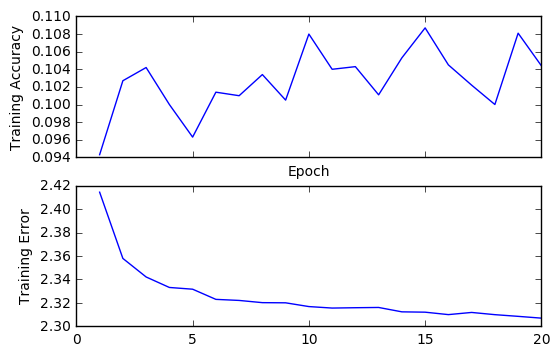

In [25]:
plot_training_history(history)

# Momentum(Adam)

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [27]:
%%time
train_and_show_result(model)

Epoch 1/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 2/20
8s - loss: 14.5385 - acc: 0.0980
Epoch 3/20
8s - loss: 14.5385 - acc: 0.0980
Epoch 4/20
11s - loss: 14.5385 - acc: 0.0980
Epoch 5/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 6/20
9s - loss: 14.5385 - acc: 0.0980
Epoch 7/20
8s - loss: 14.5385 - acc: 0.0980
Epoch 8/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 9/20
8s - loss: 14.5385 - acc: 0.0980
Epoch 10/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 11/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 12/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 13/20
8s - loss: 14.5385 - acc: 0.0980
Epoch 14/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 15/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 16/20
8s - loss: 14.5385 - acc: 0.0980
Epoch 17/20
9s - loss: 14.5385 - acc: 0.0980
Epoch 18/20
10s - loss: 14.5385 - acc: 0.0980
Epoch 19/20
7s - loss: 14.5385 - acc: 0.0980
Epoch 20/20
7s - loss: 14.5385 - acc: 0.0980
 992/1000 [============================>.] - ETA: 0s
--------------------
Total Testing Loss:  0.11 
Testin

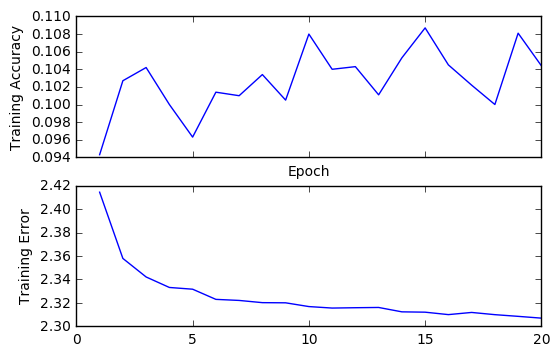

In [28]:
plot_training_history(history)

# Dropout

In [29]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500, activation='relu'))

model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(output_dim=500, activation='relu'))

model.add(Dense(output_dim=10, activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [32]:
%%time
train_and_show_result(model)

Epoch 1/20
10s - loss: 4.2702 - acc: 0.0946
Epoch 2/20
10s - loss: 2.3024 - acc: 0.1224
Epoch 3/20
9s - loss: 2.1555 - acc: 0.1938
Epoch 4/20
11s - loss: 2.0220 - acc: 0.2304
Epoch 5/20
8s - loss: 1.9525 - acc: 0.2368
Epoch 6/20
11s - loss: 1.8827 - acc: 0.2495
Epoch 7/20
10s - loss: 1.8506 - acc: 0.2544
Epoch 8/20
10s - loss: 1.8184 - acc: 0.2559
Epoch 9/20
9s - loss: 1.7940 - acc: 0.2597
Epoch 10/20
10s - loss: 1.7780 - acc: 0.2623
Epoch 11/20
11s - loss: 1.7621 - acc: 0.2675
Epoch 12/20
10s - loss: 1.7429 - acc: 0.2713
Epoch 13/20
8s - loss: 1.7329 - acc: 0.2770
Epoch 14/20
8s - loss: 1.7121 - acc: 0.2703
Epoch 15/20
9s - loss: 1.7107 - acc: 0.2807
Epoch 16/20
8s - loss: 1.6879 - acc: 0.2866
Epoch 17/20
8s - loss: 1.6852 - acc: 0.2898
Epoch 18/20
8s - loss: 1.6724 - acc: 0.2848
Epoch 19/20
9s - loss: 1.6654 - acc: 0.2951
Epoch 20/20
8s - loss: 1.6472 - acc: 0.2952
 992/1000 [============================>.] - ETA: 0s
--------------------
Total Testing Loss:  0.099 
Testing Accuracy: 

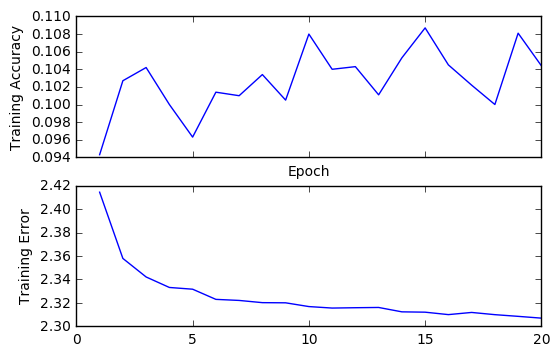

In [33]:
plot_training_history(history)